In [10]:
class Measure:
    def __init__(self, average, variance) -> None:
        self.average = average
        self.variance = variance
    def __str__(self) -> str:
        return f"({self.average}, {self.variance})"
    def __add__(self, other):
        p1 = (other.variance)/(other.variance + self.variance)
        p2 = (self.variance)/(other.variance + self.variance)
        y12 = p1*self.average + p2*other.average
        variance = (1/self.variance + 1/other.variance)**(-1)
        return Measure(y12, variance)
    def __sub__ (self, other):
        y = self.average + other.average
        variance = self.variance + other.variance
        return Measure(y, variance)
    def __mul__(self, other):
        variance = (other**2)*self.variance
        y = other*self.average
        return Measure(y, variance)
    
a = Measure(1, 0.1)
b = Measure(1, 0.2)
print(a+b)
print(a*2)
print(a-b*(-1))

(1.0, 0.06666666666666667)
(2, 0.4)
(0, 0.30000000000000004)


In [15]:
class d2X:
    def __init__(self) -> None:
        self.value = [Measure(0,100), Measure(0,100), Measure(0,100), Measure(0, 100)]
    def by_x(self, xvalue):
        xk3 = xvalue[3]
        xk2 = xvalue[2]
        xk1 = xvalue[1]

        return xk1*(1) - xk2*(-2) - xk3*(1) 
    def by_dx(self, dxvalue):
        dxk1 = dxvalue[1]
        dxk2 = dxvalue[2]
        return dxk1*(1) - dxk2*(-1)
    
    def by_u(self, uvalue):
        uk1 = uvalue[1]
        return uk1
    
a = d2X()




af = a1+a2+a3
print(af)
    
        

(1, 0.6)
(1, 0.2)
(1, 0.1)
(1.0, 0.06)


In [57]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 200, 1000)
variance = 2
mu, sigma = 0, variance**(0.5)

a = 0.01 
v = [a*i for i in time] + np.random.normal(mu, 0.001**(0.5), 1000)
p = [a*i**2/2 for i in time] +  np.random.normal(mu, 2**(0.5), 1000)
a_ = [a]*1000 + np.random.normal(mu,  5e-6**(0.5), 1000)

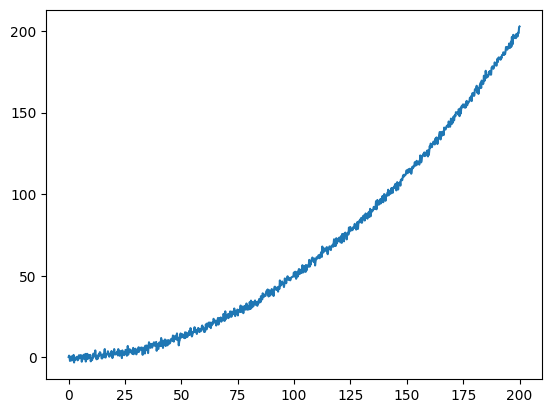

In [58]:
plt.plot(time, p)

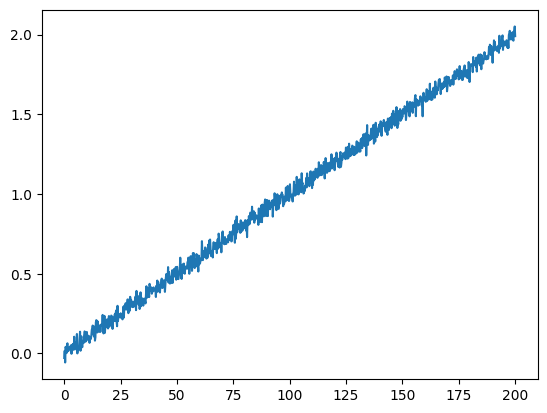

In [59]:
plt.plot(time, v)

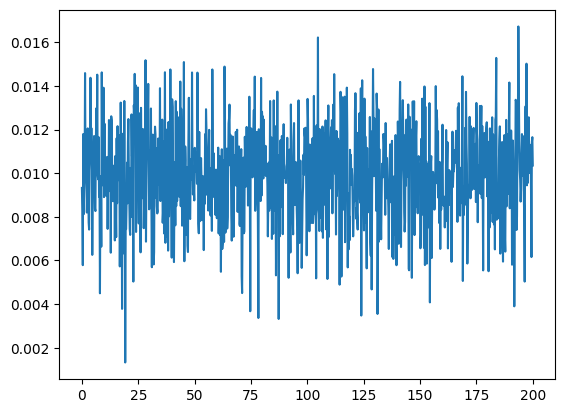

In [60]:
plt.plot(time, a_)

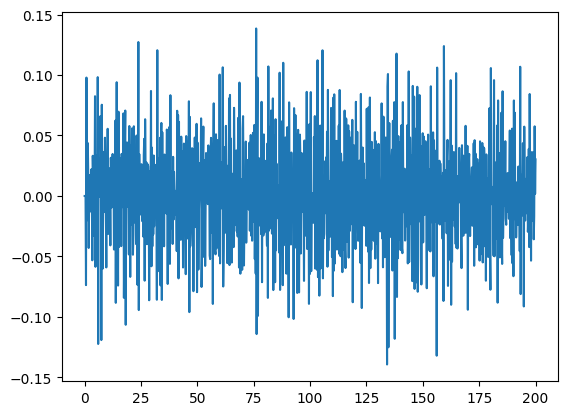

In [64]:
a = d2X()
acalc = [0]*len(time)


for i in range(3, 1000):
    xk3 = Measure(p[i-3], 2)
    xk2 = Measure(p[i-2], 2)
    xk1 = Measure(p[i-1], 2)
    xk0 = Measure(p[i], 2)

    dxk0 = Measure(v[i], 0.001)
    dxk1 = Measure(v[i-1], 0.001)
    dxk2 = Measure(v[i-2], 0.001)

    uk0 = Measure(a_[i], 5e-6)
    uk1 = Measure(a_[i-1], 5e-6)

    xvalue = [xk0, xk1, xk2, xk3]
    dxvalue = [dxk0, dxk1, dxk2]
    uvalue = [uk0, uk1]

    a1 = a.by_x(xvalue)
    a2 = a.by_dx(dxvalue)
    a3 = a.by_u(uvalue)
    acalc[i] = (a1+a2).average


plt.plot(time, acalc)


    